In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
df_class = pd.read_csv("classification_data.csv")

# Split features and target
X = df_class.drop("Mortality_Status", axis=1)
y = df_class["Mortality_Status"]

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X.columns.tolist()

['Age',
 'Sex',
 'Occupation',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive']

In [ ]:
# --- Ensemble Learning with Two Base Learners ---
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=5)  # Replace with best K if known

ensemble = VotingClassifier(
    estimators=[('lr', lr), ('knn', knn)],
    voting='soft'
)

ensemble.fit(X_train_scaled, y_train)
y_pred_ensemble = ensemble.predict(X_test_scaled)

print("Ensemble Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Ensemble Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Ensemble Confusion Matrix:
 [[662  20]
 [106  17]]
Ensemble Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       682
           1       0.46      0.14      0.21       123

    accuracy                           0.84       805
   macro avg       0.66      0.55      0.56       805
weighted avg       0.80      0.84      0.81       805



In [14]:
# --- Evaluate base learners individually ---
for model, name in zip([lr, knn], ['Logistic Regression', 'KNN']):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       682
           1       0.59      0.13      0.21       123

    accuracy                           0.85       805
   macro avg       0.73      0.56      0.57       805
weighted avg       0.82      0.85      0.81       805


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       682
           1       0.34      0.16      0.22       123

    accuracy                           0.82       805
   macro avg       0.60      0.55      0.56       805
weighted avg       0.78      0.82      0.80       805



In [15]:
# --- Load and prepare regression dataset ---
df_reg = pd.read_csv("regression_data.csv")
Xr = df_reg.drop("Survival_Months", axis=1)
yr = df_reg["Survival_Months"]

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)


In [ ]:
# --- Regression Models ---
dt1 = DecisionTreeRegressor(random_state=0)
dt1.fit(Xr_train, yr_train)

dt2 = DecisionTreeRegressor(max_depth=4, random_state=0)
dt2.fit(Xr_train, yr_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

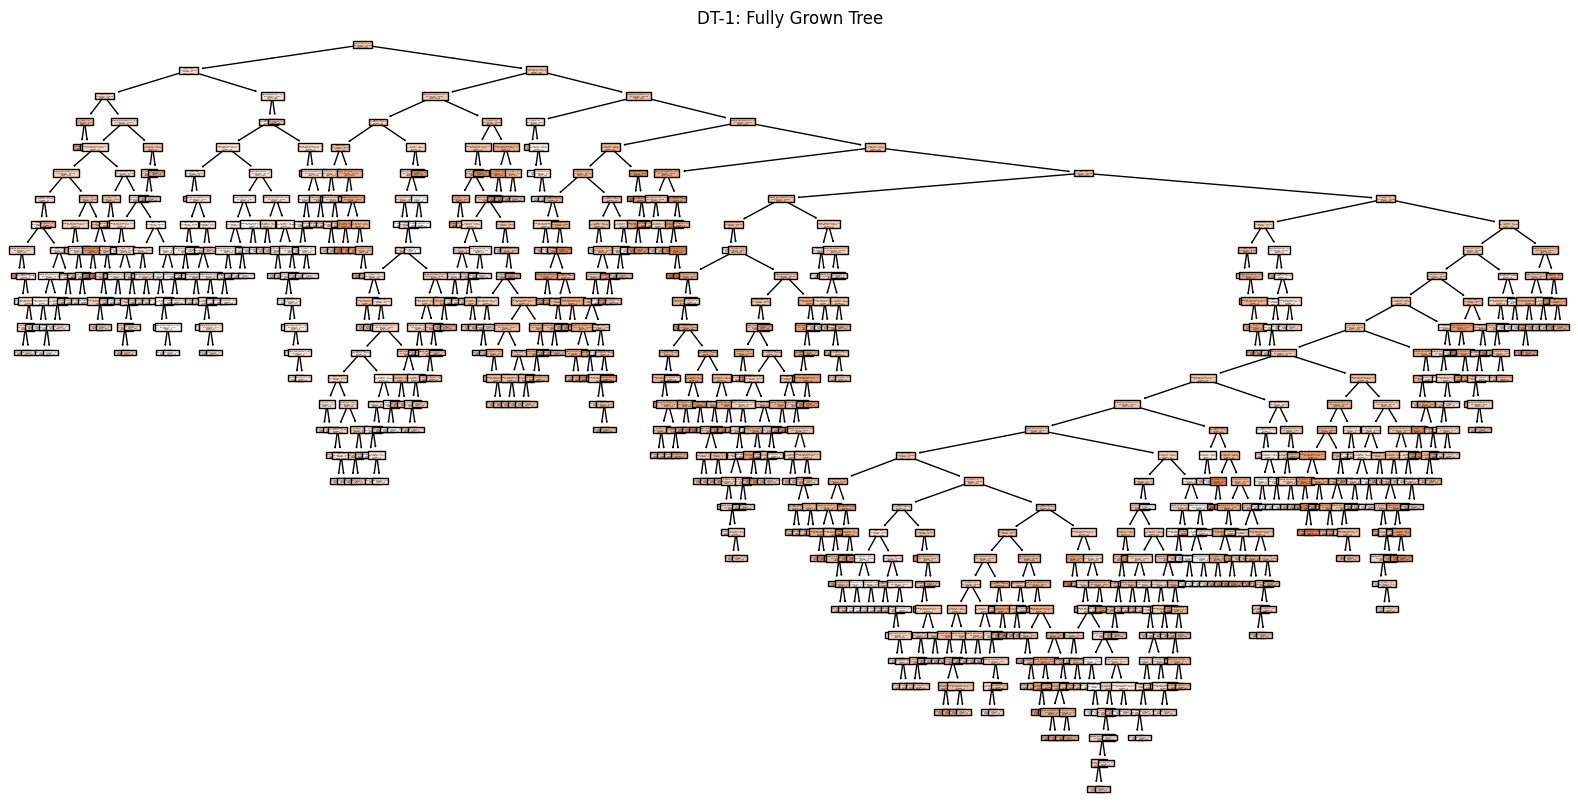


--- DT-1 Evaluation ---
Mean Squared Error (MSE): 1141.52
Mean Absolute Error (MAE): 25.94
R² Score: -1.08


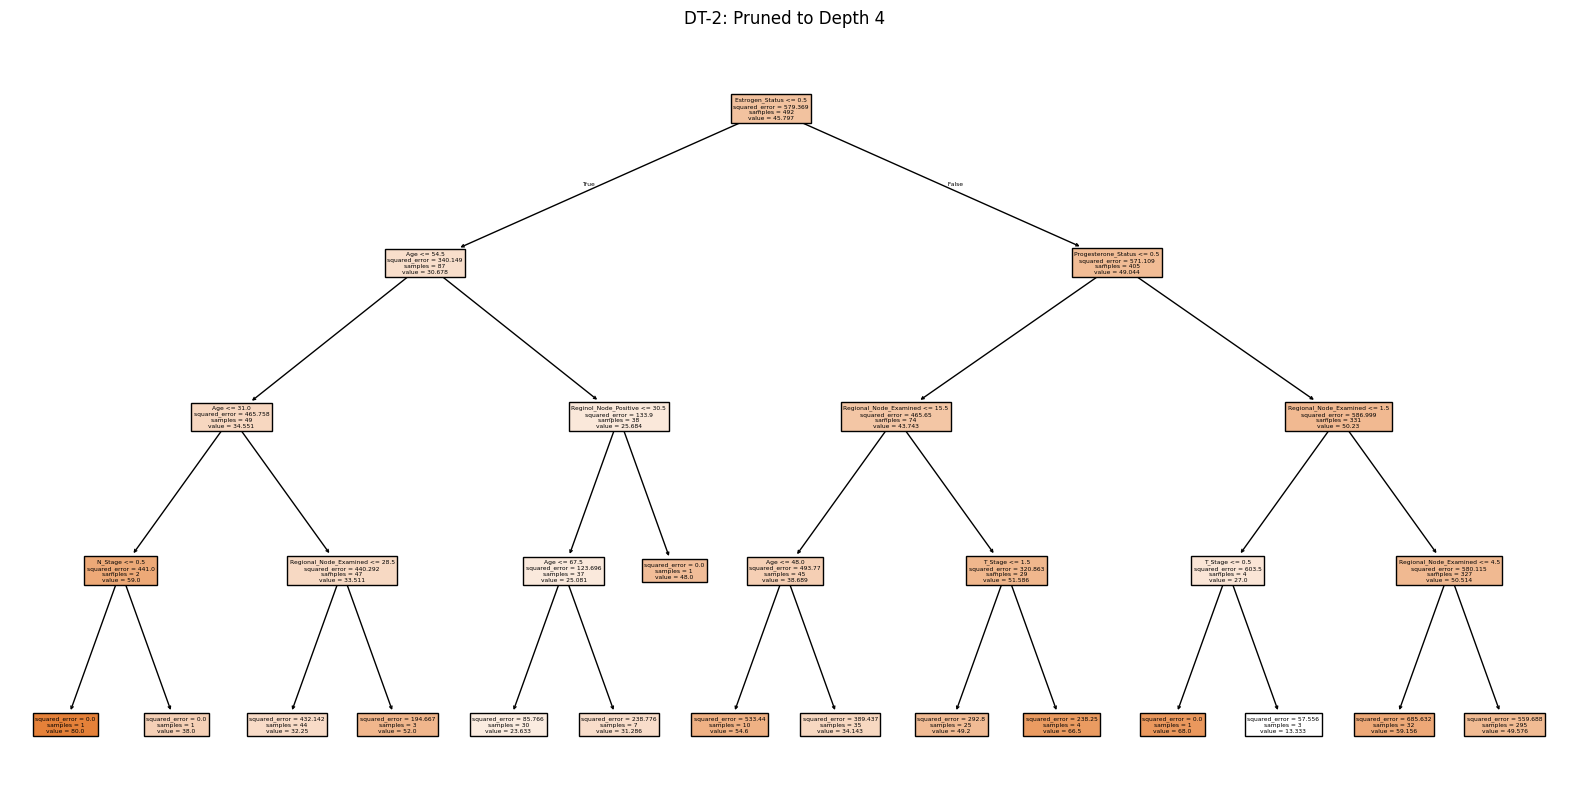


--- DT-2 Evaluation ---
Mean Squared Error (MSE): 601.66
Mean Absolute Error (MAE): 19.54
R² Score: -0.10


In [17]:
# --- Visualise and Evaluate DT-1: Fully Grown Tree ---
plt.figure(figsize=(20, 10))
plot_tree(dt1, filled=True, feature_names=Xr.columns)
plt.title("DT-1: Fully Grown Tree")
plt.show()

# Predict and evaluate DT-1
y_pred_dt1 = dt1.predict(Xr_test)
mse_dt1 = mean_squared_error(yr_test, y_pred_dt1)
mae_dt1 = mean_absolute_error(yr_test, y_pred_dt1)
r2_dt1 = r2_score(yr_test, y_pred_dt1)

print("\n--- DT-1 Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_dt1:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt1:.2f}")
print(f"R² Score: {r2_dt1:.2f}")

# --- Visualise and Evaluate DT-2: Pruned Tree ---
plt.figure(figsize=(20, 10))
plot_tree(dt2, filled=True, feature_names=Xr.columns)
plt.title("DT-2: Pruned to Depth 4")
plt.show()

# Predict and evaluate DT-2
y_pred_dt2 = dt2.predict(Xr_test)
mse_dt2 = mean_squared_error(yr_test, y_pred_dt2)
mae_dt2 = mean_absolute_error(yr_test, y_pred_dt2)
r2_dt2 = r2_score(yr_test, y_pred_dt2)

print("\n--- DT-2 Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_dt2:.2f}")
print(f"Mean Absolute Error (MAE): {mae_dt2:.2f}")
print(f"R² Score: {r2_dt2:.2f}")


In [18]:
# Load raw classification data to rebuild encoders correctly
raw_df = pd.read_csv("5DATA002W.2 Coursework Dataset(25012025v6.0).csv")

# Rebuild label encoders using raw strings
label_encoders = {}
categorical_cols = ['Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
                    'A_Stage', 'Estrogen_Status', 'Progesterone_Status']

for col in categorical_cols:
    le = LabelEncoder()
    raw_df[col] = raw_df[col].astype(str)
    le.fit(raw_df[col])
    label_encoders[col] = le


In [19]:
print(list(Xr_train.columns))


['Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive']


In [20]:
patient = pd.DataFrame([{
    'Age': 29,
    'Sex': label_encoders['Sex'].transform(['Female'])[0],
    'Occupation': 15,
    'T_Stage': label_encoders['T_Stage'].transform(['T3'])[0],
    'N_Stage': label_encoders['N_Stage'].transform(['N1'])[0],
    '6th_Stage': label_encoders['6th_Stage'].transform(['IIIC'])[0],
    'Differentiated': label_encoders['Differentiated'].transform(['Moderately differentiated'])[0],
    'Grade': 2,
    'A_Stage': label_encoders['A_Stage'].transform(['Regional'])[0],
    'Tumor_Size': 41,
    'Estrogen_Status': label_encoders['Estrogen_Status'].transform(['Negative'])[0],
    'Progesterone_Status': label_encoders['Progesterone_Status'].transform(['Positive'])[0],
    'Regional_Node_Examined': 5,
    'Reginol_Node_Positive': 1
}])

# Predict using best regression model (DT-2)
predicted_months = dt2.predict(patient)
print(f"\nPredicted Survival Months for B002565: {predicted_months[0]:.1f}")



Predicted Survival Months for B002565: 80.0
